<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/combined_dataset.csv')
df

,Time Stamp,Speaker,Transcript,Label,Numeric_Label
0,00:00:04,Speaker 1,Yeah.,Statement,1
1,00:00:05,Speaker 1,So can you tell me now? We'll go one after ano...,Statement,1
2,00:00:13,Speaker 2,"OK, OK. Yeah.",Statement,1
3,00:00:15,Speaker 1,So tell me.,Statement,1
4,00:00:19,Speaker 1,What is sampling? What is sampling?,Question,-1
...,...,...,...,...,...
3657,00:10:28,Speaker 2,OK. Thank you very much.,Statement,1
3658,00:10:29,Speaker 3,"So basically, yes Sir.",Statement,1
3659,00:10:32,Speaker 2,You are saying something?,Question,-1
3660,00:10:33,Speaker 3,"No, Sir. No, Sir. Thank you.",Statement,1


In [3]:
work_dataset = df['Numeric_Label']
work_dataset


,Numeric_Label
0,1
1,1
2,1
3,1
4,-1
...,...
3657,1
3658,1
3659,-1
3660,1


In [4]:
X = df.drop(columns=['Numeric_Label'])  # Features (all columns except the target)
y = df['Numeric_Label']  # Target (the column you're predicting)



In [5]:
encoder = OneHotEncoder(sparse=False)  # sparse=False to get a dense array

# Apply the encoder to all columns (if all are categorical)
X_encoded = encoder.fit_transform(X)

# Step 4: Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)   # Train the model with LogisticRegression for classification
y_train_pred = reg.predict(X_train)   # Predict on the training data



In [7]:
y_train_pred

array([ 1.,  1., -1., ...,  1., -1.,  1.])

In [8]:

# MSE (Mean Squared Error)
mse_train = mean_squared_error(y_train, y_train_pred)

# RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mse_train)

# MAPE (Mean Absolute Percentage Error)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# R2 Score
r2_train = r2_score(y_train, y_train_pred)

# Display the metrics
print(f"Training Data - MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")


Training Data - MSE: 8.772053937009818e-30, RMSE: 2.961765341314166e-15, MAPE: inf, R2: 1.0


In [10]:
# Perform k-means clustering on your data. Please remove / ignore the target variable for
# performing clustering. Sample code suggested below.
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=42, n_init="auto")
k_means.fit(X_train, y_train)

k_means.cluster_centers_


array([[3.72902424e-03, 1.24300808e-03, 3.10752020e-03, ...,
        5.46923555e-02, 3.12616532e-01, 6.32691112e-01],
       [1.25767452e-17, 1.65882932e-17, 1.51515152e-03, ...,
        6.06060606e-01, 9.31818182e-02, 3.00757576e-01]])

In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

SH = silhouette_score(X_train, k_means.labels_)
CH = calinski_harabasz_score(X_train, k_means.labels_)
DB = davies_bouldin_score(X_train, k_means.labels_)

print(f"SH = {SH}")
print(f"CH = {CH}")
print(f"DB = {DB}")

SH = 0.11944963774148291
CH = 402.79827508435454
DB = 2.676107649267565


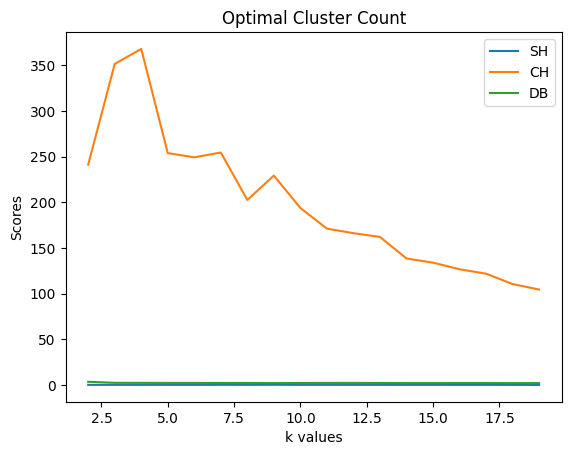

In [14]:
# A6
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k_values = range(2, 20)
SH_scores = []
CH_scores = []
DB_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(X_train)

    SH = silhouette_score(X_train, kmeans.labels_)
    CH = calinski_harabasz_score(X_train, kmeans.labels_)
    DB = davies_bouldin_score(X_train, kmeans.labels_)

    SH_scores.append(SH)
    CH_scores.append(CH)
    DB_scores.append(DB)

plt.plot(k_values, SH_scores, label="SH")
plt.plot(k_values, CH_scores, label="CH")
plt.plot(k_values, DB_scores, label="DB")
plt.legend()

plt.title("Optimal Cluster Count")
plt.xlabel("k values")
plt.ylabel("Scores")
plt.show()

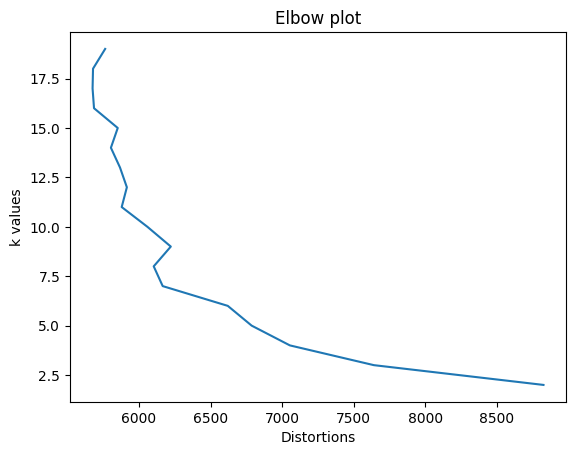

In [15]:
# A7
import matplotlib.pyplot as plt

distortions = []
k_values = range(2, 20)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init="auto")
  kmeans.fit(X_train, y_train)
  distortions.append(kmeans.inertia_)

plt.plot(distortions, k_values)
plt.title("Elbow plot")
plt.xlabel("Distortions")
plt.ylabel("k values")
plt.show()